# 6.1.4

In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [37]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [38]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

# 6.2.6

In [40]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3558c7e1c8c402d4a6c29dd5a9b4bd79


In [41]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | petropa

Processing Record 36 of Set 4 | urdoma
Processing Record 37 of Set 4 | campo verde
Processing Record 38 of Set 4 | srednekolymsk
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | menongue
Processing Record 42 of Set 4 | baykit
Processing Record 43 of Set 4 | port moresby
Processing Record 44 of Set 4 | kinsale
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | belaya gora
Processing Record 49 of Set 4 | canmore
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | avinurme
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | brewster
Processing Record 8 of Set 5 | benghazi
Processi

Processing Record 27 of Set 8 | granadilla de abona
Processing Record 28 of Set 8 | bambanglipuro
Processing Record 29 of Set 8 | asau
Processing Record 30 of Set 8 | san miguel
Processing Record 31 of Set 8 | yangjiang
Processing Record 32 of Set 8 | mangrol
Processing Record 33 of Set 8 | suzun
Processing Record 34 of Set 8 | guarapari
Processing Record 35 of Set 8 | alekseyevsk
Processing Record 36 of Set 8 | sohag
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | akyab
Processing Record 39 of Set 8 | porto-vecchio
Processing Record 40 of Set 8 | mahibadhoo
Processing Record 41 of Set 8 | veraval
Processing Record 42 of Set 8 | gurgan
City not found. Skipping...
Processing Record 43 of Set 8 | pouebo
Processing Record 44 of Set 8 | necochea
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | lieksa
Processing Record 47 of Set 8 | alotau
City not found. Skipping...
Processing Record 48 of Set 8 | montepuez
Processing Record 49 of Set 8 | v

Processing Record 14 of Set 12 | tahoua
Processing Record 15 of Set 12 | itarema
Processing Record 16 of Set 12 | great yarmouth
Processing Record 17 of Set 12 | chernyy yar
Processing Record 18 of Set 12 | byron bay
Processing Record 19 of Set 12 | neuquen
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | portland
Processing Record 22 of Set 12 | alexandria
Processing Record 23 of Set 12 | shenjiamen
Processing Record 24 of Set 12 | hetauda
Processing Record 25 of Set 12 | batagay-alyta
Processing Record 26 of Set 12 | mvuma
Processing Record 27 of Set 12 | allende
Processing Record 28 of Set 12 | puerto del rosario
Processing Record 29 of Set 12 | gonbad-e qabus
Processing Record 30 of Set 12 | ayna
Processing Record 31 of Set 12 | jiujiang
Processing Record 32 of Set 12 | mahanoro
Processing Record 33 of Set 12 | camacupa
Processing Record 34 of Set 12 | nanchang
Processing Record 35 of Set 12 | zlobin
Processing Record 36 of Set 12 | kaardi
City not foun

In [43]:
len(city_data)

556

# 6.2.7

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.27,141.97,60.48,59,31,19.42,AU,2020-06-19 02:55:04
1,Vaini,-21.20,-175.20,73.40,88,75,10.29,TO,2020-06-19 02:55:05
2,Busselton,-33.65,115.33,59.00,82,83,4.56,AU,2020-06-19 02:55:05
3,Bluff,-46.60,168.33,46.58,68,0,7.11,NZ,2020-06-19 02:55:05
4,Georgetown,5.41,100.34,84.20,88,20,3.36,MY,2020-06-19 02:52:28
5,Hermanus,-34.42,19.23,64.99,41,0,7.00,ZA,2020-06-19 02:55:06
6,Bethel,41.37,-73.41,69.80,88,20,3.36,US,2020-06-19 02:55:06
7,Bambous Virieux,-20.34,57.76,71.60,64,75,13.87,MU,2020-06-19 02:55:07
8,Tual,-5.67,132.75,81.36,81,7,19.93,ID,2020-06-19 02:55:07
9,Punta Arenas,-53.15,-70.92,37.40,100,100,8.05,CL,2020-06-19 02:50:38


In [45]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2020-06-19 02:55:04,-38.27,141.97,60.48,59,31,19.42
1,Vaini,TO,2020-06-19 02:55:05,-21.20,-175.20,73.40,88,75,10.29
2,Busselton,AU,2020-06-19 02:55:05,-33.65,115.33,59.00,82,83,4.56
3,Bluff,NZ,2020-06-19 02:55:05,-46.60,168.33,46.58,68,0,7.11
4,Georgetown,MY,2020-06-19 02:52:28,5.41,100.34,84.20,88,20,3.36
...,...,...,...,...,...,...,...,...,...
551,Obertyn,UA,2020-06-19 02:57:40,48.70,25.17,63.00,83,39,1.99
552,Artesia,US,2020-06-19 02:57:40,33.87,-118.08,70.00,56,1,5.82
553,Kaduqli,SD,2020-06-19 02:57:41,11.02,29.72,73.42,81,86,3.58
554,Awjilah,LY,2020-06-19 02:57:41,29.11,21.29,74.03,29,0,5.21


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

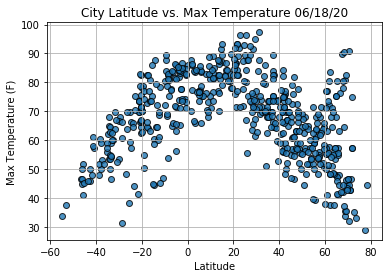

In [48]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2

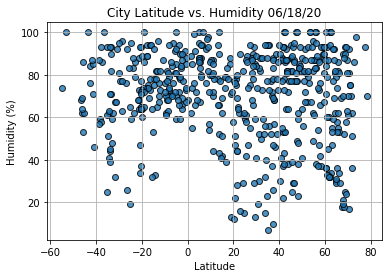

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3

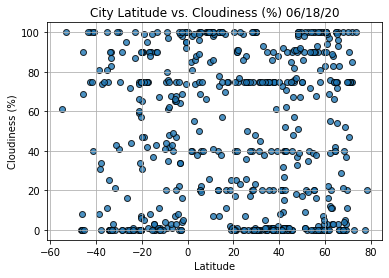

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4

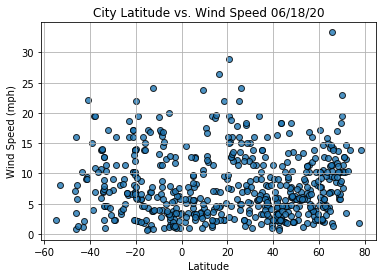

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2

In [55]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

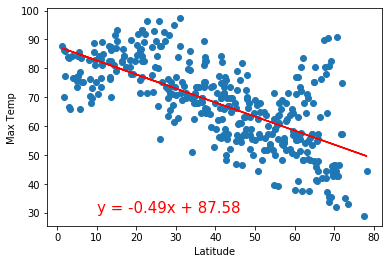

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,30))

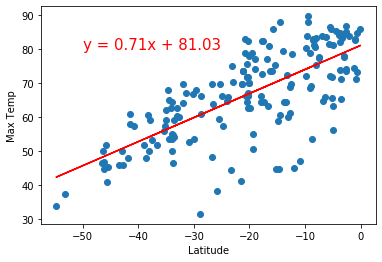

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,80))

# 6.4.3

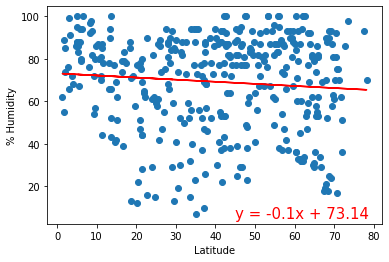

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(45,5))

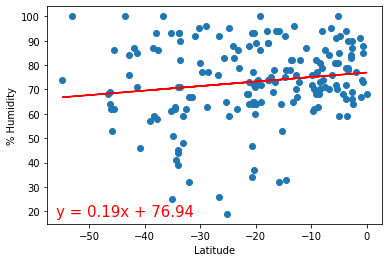

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-56,18))

# 6.4.4

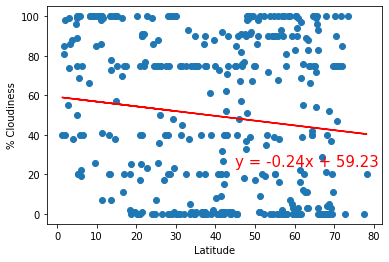

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,24))

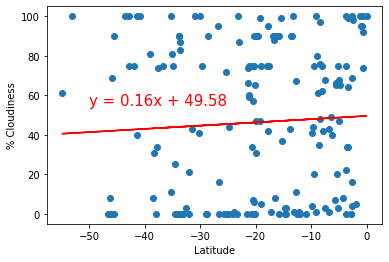

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,55))

# 6.4.5

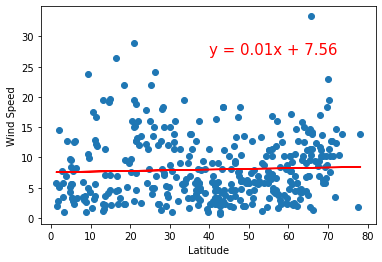

The NorthHemi r_value is 0.04249659484775658


In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,27))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f'The NorthHemi r_value is {r_value}')

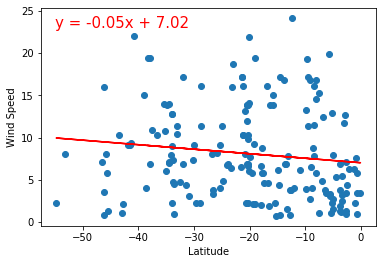

The SouthHemi r_value is -0.13009574693047868


In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-55,23))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f'The SouthHemi r_value is {r_value}')